# 4.10. DỮ LIỆU CHUỖI THỜI GIAN (TIME SERIES) TRONG PANDAS

*(Bản chỉnh sửa TLHT FULL – dùng cho bài giảng và tự học)*

Trong thực tế, rất nhiều bài toán dữ liệu gắn với **thời gian**: tỷ giá USD/VND theo ngày, doanh thu các tỉnh/thành theo tháng, chỉ số IIP/PMI theo quý, lưu lượng truy cập website theo phút,…
Những dữ liệu này được gọi chung là **chuỗi thời gian (time series)**.

Trong Pandas, xử lý time series xoay quanh 3 trụ cột:

- Kiểu dữ liệu **datetime64[ns]** và đối tượng **Timestamp**.
- **DatetimeIndex** làm trục thời gian cho Series/DataFrame.
- Các phép toán đặc trưng: chọn theo thời gian, **resample**, **rolling**, **shift/diff/pct_change**,…


>## 4.10.1. Khái niệm và cấu trúc dữ liệu thời gian

**Định nghĩa.** Dữ liệu chuỗi thời gian là tập hợp các quan sát được sắp xếp theo thứ tự thời gian. Mỗi quan sát gắn với một **mốc thời gian** (ngày, giờ, phút, quý, năm,…).

Trong Pandas, chuỗi thời gian thường xuất hiện dưới hai dạng chính:

1. DataFrame/Series có một cột ngày–giờ (kiểu datetime64[ns]).
2. DataFrame/Series có **index là DatetimeIndex** – tức là toàn bộ trục index chính là trục thời gian.

>### 4.10.1.1. Đối tượng Timestamp và DatetimeIndex

- **Timestamp**: đại diện cho một thời điểm cụ thể, ví dụ: `2025-11-23 10:30:00`.
- **DatetimeIndex**: là một tập hợp đã sắp xếp của các Timestamp, dùng làm index.

Ưu điểm của DatetimeIndex:

- Cho phép **chọn dữ liệu bằng chuỗi thời gian** rất ngắn gọn (`'2025-01'`, `'2025'`, `'2025-03-10':'2025-03-20'`).
- Dùng được trực tiếp với `.resample()`, `.rolling()`, `.shift()` và nhiều thao tác time series khác.


#### Ví dụ 4.10.1.1.

In [1]:
import pandas as pd

# Ví dụ về Timestamp
t = pd.Timestamp('2025-11-23 10:30:00')
print('Giá trị Timestamp:', t)
print('Kiểu dữ liệu:', type(t))

# Ví dụ DatetimeIndex đơn giản
idx = pd.date_range(start='2025-01-01', periods=5, freq='D')
print('\nDatetimeIndex mẫu:')
print(idx)


Giá trị Timestamp: 2025-11-23 10:30:00
Kiểu dữ liệu: <class 'pandas._libs.tslibs.timestamps.Timestamp'>

DatetimeIndex mẫu:
DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05'],
              dtype='datetime64[ns]', freq='D')


>### 4.10.1.2. Chuẩn hoá cột ngày sang kiểu datetime

Trong thực tế, dữ liệu thường được đọc từ file CSV/Excel, cột ngày thường lưu dưới dạng **chuỗi (string)**. Để xử lý như chuỗi thời gian, ta cần chuyển sang kiểu `datetime64[ns]` bằng `pd.to_datetime()`.


#### Ví dụ 4.10.1.2.

In [2]:
# Ví dụ: doanh thu theo ngày của một cửa hàng ở Hà Nội (dữ liệu giả lập)
data = {
    'ngay': [
        '2025-01-01', '2025-01-02', '2025-01-03',
        '2025-01-04', '2025-01-05', '2025-01-06',
        '2025-01-07'
    ],
    'doanh_thu': [12_000_000, 11_500_000, 13_200_000,
                  14_000_000, 13_800_000, 15_500_000,
                  16_200_000]
}
df = pd.DataFrame(data)
print(df.dtypes)
df

ngay         object
doanh_thu     int64
dtype: object


,ngay,doanh_thu
0,2025-01-01,12000000
1,2025-01-02,11500000
2,2025-01-03,13200000
3,2025-01-04,14000000
4,2025-01-05,13800000
5,2025-01-06,15500000
6,2025-01-07,16200000


In [3]:
# Chuẩn hoá cột 'ngay' sang kiểu datetime
df['ngay'] = pd.to_datetime(df['ngay'])
print(df.dtypes)
df

ngay         datetime64[ns]
doanh_thu             int64
dtype: object


,ngay,doanh_thu
0,2025-01-01,12000000
1,2025-01-02,11500000
2,2025-01-03,13200000
3,2025-01-04,14000000
4,2025-01-05,13800000
5,2025-01-06,15500000
6,2025-01-07,16200000


> ℹ️ **Ghi nhớ:**
> - `pd.to_datetime()` có thể tự nhận dạng nhiều định dạng ngày như `YYYY-MM-DD`, `YYYY/MM/DD`, `DD-Mon-YYYY`,…
> - Với định dạng không chuẩn, ta nên chỉ rõ `format`, ví dụ: `format='%d/%m/%Y'`.


### 4.10.1.3. Tạo DatetimeIndex từ cột thời gian

Sau khi cột ngày đã là `datetime64[ns]`, ta thường đưa nó lên làm index để khai thác sức mạnh time series.


#### Ví dụ 4.10.1.3

In [4]:
df

,ngay,doanh_thu
0,2025-01-01,12000000
1,2025-01-02,11500000
2,2025-01-03,13200000
3,2025-01-04,14000000
4,2025-01-05,13800000
5,2025-01-06,15500000
6,2025-01-07,16200000


In [5]:
# Đặt cột 'ngay' làm DatetimeIndex
df = df.set_index('ngay')
df

,doanh_thu
ngay,
2025-01-01,12000000
2025-01-02,11500000
2025-01-03,13200000
2025-01-04,14000000
2025-01-05,13800000
2025-01-06,15500000
2025-01-07,16200000


Giờ đây:

- Index của `df` là DatetimeIndex.
- Ta có thể chọn theo ngày/tháng/năm bằng `.loc` với chuỗi thời gian.

Ta thử xem kiểu index:


In [6]:
type(df.index), df.index

(pandas.core.indexes.datetimes.DatetimeIndex,
 DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
                '2025-01-05', '2025-01-06', '2025-01-07'],
               dtype='datetime64[ns]', name='ngay', freq=None))

>## 4.10.2. Truy vấn dữ liệu theo thời gian

Khi sử dụng DatetimeIndex, ta có thể **truy vấn dữ liệu rất linh hoạt**:

- Truy vấn theo một `ngày` cụ thể.
- Truy vấn theo `khoảng ngày`.
- Truy vấn theo `cả tháng` hoặc `cả năm` bằng `chuỗi rút gọn` (partial string).

>### 4.10.2.1. Truy vấn theo ngày, khoảng ngày, tháng, năm


#### Ví dụ 4.10.2.1

In [7]:
# Lấy doanh thu ngày 2025-01-03
doanh_thu_3 = df.loc['2025-01-03']
doanh_thu_3

doanh_thu    13200000
Name: 2025-01-03 00:00:00, dtype: int64

In [8]:
# Lấy doanh thu từ 2025-01-03 đến 2025-01-06
df.loc['2025-01-03':'2025-01-06']

,doanh_thu
ngay,
2025-01-03,13200000
2025-01-04,14000000
2025-01-05,13800000
2025-01-06,15500000


Với chuỗi dài nhiều tháng/năm, ta có thể dùng **partial string indexing**:

- `'2025-01'` → toàn bộ dữ liệu của tháng 1/2025.
- `'2025'` → toàn bộ dữ liệu của năm 2025.

Ta minh hoạ bằng chuỗi dữ liệu giả lập cho cả quý I/2025.


In [9]:
#Tạo DataFrame với chỉ mục là dải ngày trong quí 1 năm 2025
idx_quarter = pd.date_range(start='2025-01-01', end='2025-03-31', freq='D')
df_q = pd.DataFrame({'doanh_thu': range(len(idx_quarter))}, index=idx_quarter)

# Lấy dữ liệu tháng 3/2025
thang_3_2025 = df_q.loc['2025-03']
thang_3_2025.head()

,doanh_thu
2025-03-01,59
2025-03-02,60
2025-03-03,61
2025-03-04,62
2025-03-05,63


>### 4.10.2.2. Thuộc tính `.dt` trên cột datetime

Trong nhiều dataset, ta không muốn đưa ngày lên index mà vẫn giữ dưới dạng cột. Lúc này, ta dùng thuộc tính `.dt` để trích xuất **năm, tháng, ngày, thứ, quý**.


#### Ví dụ 4.10.2.2

In [10]:
data2 = {
    'ngay': pd.to_datetime([
        '2025-01-01', '2025-02-15', '2025-03-10',
        '2025-03-25', '2025-04-05'
    ]),
    'doanh_thu': [10, 11, 15, 14, 16]
}
df_time = pd.DataFrame(data2)

df_time['nam'] = df_time['ngay'].dt.year                #Trích xuất năm
df_time['thang'] = df_time['ngay'].dt.month             #Trích xuất tháng
df_time['ngay_trong_thang'] = df_time['ngay'].dt.day    #Trích xuất ngày trong tháng
df_time

,ngay,doanh_thu,nam,thang,ngay_trong_thang
0,2025-01-01,10,2025,1,1
1,2025-02-15,11,2025,2,15
2,2025-03-10,15,2025,3,10
3,2025-03-25,14,2025,3,25
4,2025-04-05,16,2025,4,5


In [11]:
# Lọc các dòng thuộc tháng 3/2025
df_time[df_time['ngay'].dt.month == 3]

,ngay,doanh_thu,nam,thang,ngay_trong_thang
2,2025-03-10,15,2025,3,10
3,2025-03-25,14,2025,3,25


> 💡 **Ghi nhớ:** Thuộc tính `.dt` chỉ dùng được khi cột có dtype là `datetime64[ns]`. Nếu vẫn là `object` (chuỗi), ta cần `pd.to_datetime()` trước.


>## 4.10.3. Thay đổi tần suất dữ liệu bằng `resample`

Trong thực tế, dữ liệu có thể được thu thập với tần suất **hàng ngày** (daily), nhưng ta muốn phân tích theo **tháng** hoặc **quý**. Hoặc ngược lại, từ dữ liệu tuần ta muốn nội suy xuống từng ngày.

- **Downsampling**: giảm tần suất (ví dụ: từ ngày → tháng). Cần **hàm tổng hợp** (`sum`, `mean`, `min`, `max`,...).
- **Upsampling**: tăng tần suất (ví dụ: từ tháng → ngày). Thường cần **điền giá trị** (`ffill`, `bfill`,...).


### Ví dụ 4.10.3.1: Từ doanh thu ngày → Doanh thu tháng

In [12]:
# Tạo dữ liệu giả lập: doanh thu hàng ngày trong tháng 1/2025 của một cửa hàng
idx_daily = pd.date_range(start='2025-01-01', end='2025-01-31', freq='D')
doanh_thu_daily = [10 + i * 0.3 for i in range(len(idx_daily))]  # tăng dần nhẹ
df_daily = pd.DataFrame({'doanh_thu': doanh_thu_daily}, index=idx_daily)
df_daily.head()

,doanh_thu
2025-01-01,10.0
2025-01-02,10.3
2025-01-03,10.6
2025-01-04,10.9
2025-01-05,11.2


In [13]:
# Downsampling: tổng doanh thu theo tháng (freq='M' = cuối tháng)
doanh_thu_theo_thang = df_daily.resample('M')['doanh_thu'].sum()
doanh_thu_theo_thang

C:\Users\Admin\AppData\Local\Temp\ipykernel_16624\1868182385.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  doanh_thu_theo_thang = df_daily.resample('M')['doanh_thu'].sum()


2025-01-31    449.5
Freq: ME, Name: doanh_thu, dtype: float64

In [14]:
# Downsampling: tổng doanh thu theo tháng (freq='M' = cuối tháng)
doanh_thu_theo_thang = df_daily.resample('ME')['doanh_thu'].sum() #Thay M bằng ME để lấy cuối tháng tránh cảnh báo 'FutureWarning'
doanh_thu_theo_thang

2025-01-31    449.5
Freq: ME, Name: doanh_thu, dtype: float64

In [15]:
# Downsampling: trung bình doanh thu theo tháng
doanh_thu_tb_thang = df_daily.resample('ME')['doanh_thu'].mean()
doanh_thu_tb_thang

2025-01-31    14.5
Freq: ME, Name: doanh_thu, dtype: float64

#### Ví dụ 4.10.3.2. Trực quan hóa

Ta có thể trực quan hóa chuỗi này bằng biểu đồ đường.


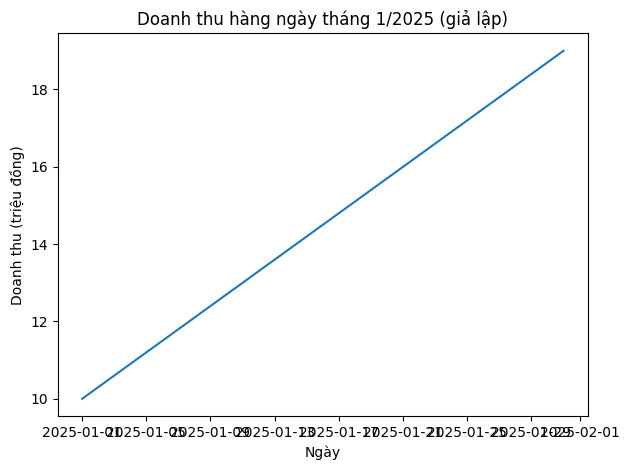

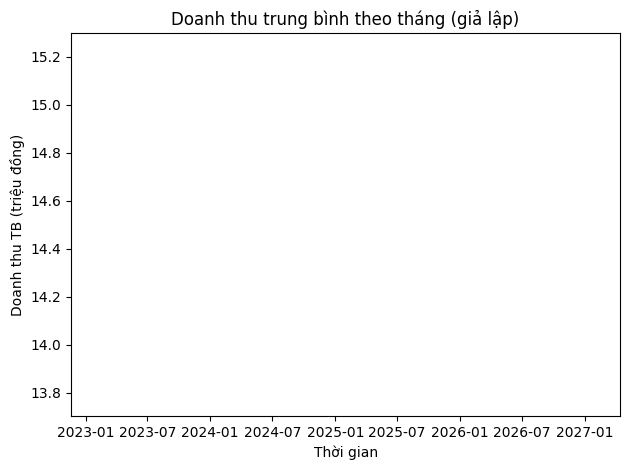

In [16]:
import matplotlib.pyplot as plt

# Vẽ doanh thu hàng ngày và doanh thu trung bình tháng
plt.figure()
plt.plot(df_daily.index, df_daily['doanh_thu'])
plt.title('Doanh thu hàng ngày tháng 1/2025 (giả lập)')
plt.xlabel('Ngày')
plt.ylabel('Doanh thu (triệu đồng)')
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(doanh_thu_tb_thang.index, doanh_thu_tb_thang.values)
plt.title('Doanh thu trung bình theo tháng (giả lập)')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu TB (triệu đồng)')
plt.tight_layout()
plt.show()

>### 4.10.3.3. So sánh `resample()` và `asfreq()`

- `resample('M').sum()` → gộp dữ liệu và tính toán lại (ví dụ: tổng theo tháng).
- `asfreq('M')` → chỉ đổi tần suất index, không tổng hợp, không tính toán.


In [17]:
# So sánh resample vs asfreq
df_resample_sum = df_daily.resample('5D')['doanh_thu'].sum()
df_asfreq = df_daily.asfreq('5D')

print('Resample (5 ngày, sum):')
print(df_resample_sum.head())

print('\nAsfreq (5 ngày, không tính toán):')
print(df_asfreq.head())

Resample (5 ngày, sum):
2025-01-01    53.0
2025-01-06    60.5
2025-01-11    68.0
2025-01-16    75.5
2025-01-21    83.0
Freq: 5D, Name: doanh_thu, dtype: float64

Asfreq (5 ngày, không tính toán):
            doanh_thu
2025-01-01       10.0
2025-01-06       11.5
2025-01-11       13.0
2025-01-16       14.5
2025-01-21       16.0


>## 4.10.4. Dịch chuyển thời gian và tăng trưởng: `shift`, `diff`, `pct_change`

Trong phân tích tài chính – kinh tế (tỷ giá, lãi suất, CPI, IIP, PMI,…), ta thường quan tâm đến **mức thay đổi tuyệt đối** và **tỷ lệ tăng/giảm** giữa các kỳ.

Pandas cung cấp các phương thức cốt lõi:

- `.shift(n)`: dịch chuỗi đi `n` bước (dùng để tạo **lag** – giá trị kỳ trước).
- `.diff(n)`: hiệu giữa giá trị hiện tại và giá trị cách `n` bước.
- `.pct_change(n)`: tỷ lệ % thay đổi so với `n` bước trước.

### 4.10.4.1. Ví dụ: Tỷ giá USD/VND năm 2025 (giả lập)


In [18]:
# Dữ liệu tỷ giá USD/VND (giả lập) 7 ngày đầu năm 2025
idx_fx = pd.date_range(start='2025-01-02', periods=7, freq='D')
ty_gia = [24500, 24520, 24510, 24540, 24580, 24560, 24600]

df_fx = pd.DataFrame({'ty_gia': ty_gia}, index=idx_fx)
df_fx

,ty_gia
2025-01-02,24500
2025-01-03,24520
2025-01-04,24510
2025-01-05,24540
2025-01-06,24580
2025-01-07,24560
2025-01-08,24600


#### Ví dụ 4.10.4.1

In [19]:
# Tạo cột tỷ giá ngày hôm trước (lag 1)
df_fx['ty_gia_lag1'] = df_fx['ty_gia'].shift(1)

# Mức thay đổi tuyệt đối
df_fx['thay_doi'] = df_fx['ty_gia'].diff(1)

# Tỷ lệ % thay đổi so với ngày hôm trước
df_fx['pct_change'] = df_fx['ty_gia'].pct_change(1) * 100

df_fx

,ty_gia,ty_gia_lag1,thay_doi,pct_change
2025-01-02,24500,NaN,NaN,NaN
2025-01-03,24520,24500.0,20.0,0.081633
2025-01-04,24510,24520.0,-10.0,-0.040783
2025-01-05,24540,24510.0,30.0,0.122399
2025-01-06,24580,24540.0,40.0,0.162999
2025-01-07,24560,24580.0,-20.0,-0.081367
2025-01-08,24600,24560.0,40.0,0.162866


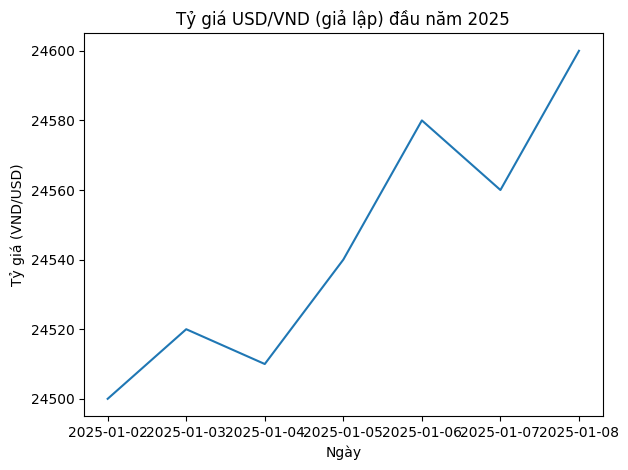

In [20]:
# Vẽ chuỗi tỷ giá USD/VND giả lập
plt.figure()
plt.plot(df_fx.index, df_fx['ty_gia'])
plt.title('Tỷ giá USD/VND (giả lập) đầu năm 2025')
plt.xlabel('Ngày')
plt.ylabel('Tỷ giá (VND/USD)')
plt.tight_layout()
plt.show()

> ⚠️ **Chú ý:**
> - Hàng đầu tiên không có dữ liệu kỳ trước → `lag1`, `thay_doi`, `pct_change` sẽ là NaN.
> - Khi sử dụng cho báo cáo, cần quyết định xử lý NaN (bỏ dòng đầu, hoặc điền 0 nếu chấp nhận).


## 4.10.5. Cửa sổ trượt (Rolling Window) và trung bình động

**Rolling window** là kỹ thuật tính toán một chỉ tiêu (trung bình, tổng, độ lệch chuẩn,…) trên một **cửa sổ thời gian trượt**, giúp làm mượt dữ liệu và quan sát xu hướng thay vì những biến động ngắn hạn theo kỳ.

Kỹ thuật này **không phụ thuộc vào đơn vị thời gian**.  
Nó áp dụng được cho chuỗi theo **ngày, tuần, tháng, quý hoặc năm**, miễn là chuỗi được sắp theo thời gian.

Ví dụ điển hình:

- **Doanh thu theo ngày** → trung bình trượt **7 ngày (MA7)** để giảm nhiễu ngày–ngày.  
- **IIP – Index of Industrial Production** (*Chỉ số Sản xuất Công nghiệp*, do **GSO** công bố hàng tháng*)  
  → thường dùng trung bình **3 tháng gần nhất (IIP_MA3)** để đánh giá xu hướng sản xuất thực.  
- **PMI – Purchasing Managers’ Index** (*Chỉ số Quản lý Thu mua*, do **S&P Global** công bố hàng tháng*)  
  → có thể dùng trung bình **3 hoặc 6 tháng (PMI_MA3, PMI_MA6)** để làm mượt biến động và theo dõi sức khỏe nền sản xuất.

> 💡 **Lưu ý quan trọng:**  `IIP` và `PMI` **chỉ được công bố theo tháng**, nên Rolling Window theo **tháng** là chính xác nhất cho các chỉ số vĩ mô này.

### 4.10.5.1. Ví dụ: IIP/PMI theo tháng (giả lập)


In [21]:
# Tạo chuỗi thời gian theo tháng (Month Start) từ tháng 1 đến tháng 12 năm 2025
idx_month = pd.date_range(start='2025-01-01', periods=12, freq='MS')

# Dữ liệu IIP giả lập (Index of Industrial Production – chỉ số sản xuất công nghiệp)
iip = [102, 103.5, 104, 103, 105, 106, 107, 106.5, 108, 109, 110, 111]

# Dữ liệu PMI giả lập (Purchasing Managers’ Index – chỉ số quản lý thu mua)
pmi = [50.5, 51.2, 52.0, 51.5, 52.3, 53.1, 52.8, 53.5, 54.0, 53.8, 54.2, 54.5]

# Gộp vào DataFrame với index theo tháng
df_macro = pd.DataFrame({'IIP': iip, 'PMI': pmi}, index=idx_month)
df_macro


,IIP,PMI
2025-01-01,102.0,50.5
2025-02-01,103.5,51.2
2025-03-01,104.0,52.0
2025-04-01,103.0,51.5
2025-05-01,105.0,52.3
2025-06-01,106.0,53.1
2025-07-01,107.0,52.8
2025-08-01,106.5,53.5
2025-09-01,108.0,54.0
2025-10-01,109.0,53.8


In [22]:
# Tính trung bình động 3 tháng cho IIP
df_macro['IIP_MA3'] = df_macro['IIP'].rolling(window=3, min_periods=1).mean()

# Tính trung bình động 3 tháng cho PMI
df_macro['PMI_MA3'] = df_macro['PMI'].rolling(window=3, min_periods=1).mean()

df_macro

,IIP,PMI,IIP_MA3,PMI_MA3
2025-01-01,102.0,50.5,102.000000,50.500000
2025-02-01,103.5,51.2,102.750000,50.850000
2025-03-01,104.0,52.0,103.166667,51.233333
2025-04-01,103.0,51.5,103.500000,51.566667
2025-05-01,105.0,52.3,104.000000,51.933333
2025-06-01,106.0,53.1,104.666667,52.300000
2025-07-01,107.0,52.8,106.000000,52.733333
2025-08-01,106.5,53.5,106.500000,53.133333
2025-09-01,108.0,54.0,107.166667,53.433333
2025-10-01,109.0,53.8,107.833333,53.766667


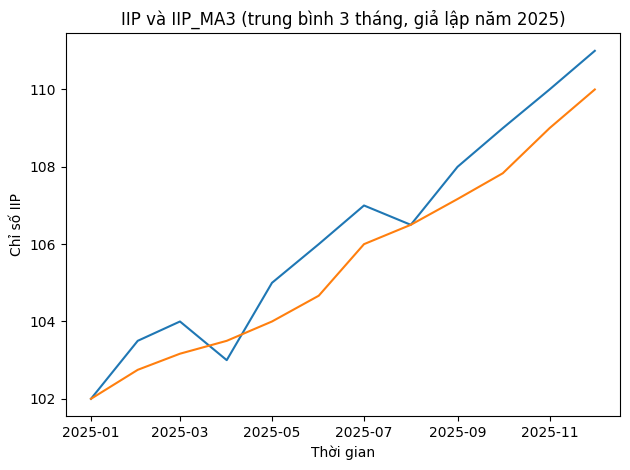

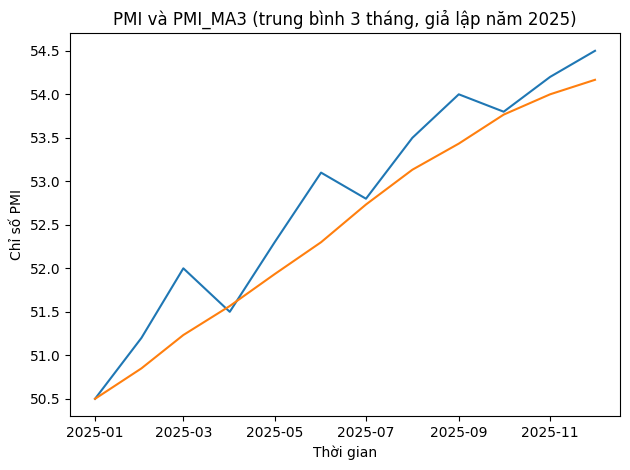

In [23]:
# Vẽ IIP và IIP_MA3
plt.figure()
plt.plot(df_macro.index, df_macro['IIP'])
plt.plot(df_macro.index, df_macro['IIP_MA3'])
plt.title('IIP và IIP_MA3 (trung bình 3 tháng, giả lập năm 2025)')
plt.xlabel('Thời gian')
plt.ylabel('Chỉ số IIP')
plt.tight_layout()
plt.show()

# Vẽ PMI và PMI_MA3
plt.figure()
plt.plot(df_macro.index, df_macro['PMI'])
plt.plot(df_macro.index, df_macro['PMI_MA3'])
plt.title('PMI và PMI_MA3 (trung bình 3 tháng, giả lập năm 2025)')
plt.xlabel('Thời gian')
plt.ylabel('Chỉ số PMI')
plt.tight_layout()
plt.show()

> 💡 **Diễn giải:**
> - Đường IIP/PMI gốc có thể dao động lên xuống từng tháng.
> - Đường trung bình động MA3 giúp làm mượt chuỗi, dễ quan sát xu hướng.
> - Với dữ liệu thật, ta có thể thay `window=3` bằng 6, 12 tùy mục đích.


## 4.10.6. Một số lưu ý và thực hành tốt (Best Practices)

1. **Luôn chuẩn hoá cột ngày** về `datetime64[ns]` bằng `pd.to_datetime()` ngay sau khi đọc dữ liệu.
2. **Xem xét đưa ngày lên làm DatetimeIndex** nếu phân tích xoay quanh trục thời gian.
3. **Cẩn trọng với NaN** khi dùng `shift`, `diff`, `pct_change`, `rolling` – đặc biệt ở những điểm biên (đầu chuỗi).
4. **Rõ ràng về tần suất dữ liệu** (D, W, M, Q, A) trước khi `resample`. Dữ liệu thiếu ngày/thiếu tháng có thể gây hiểu nhầm.
5. **Phân biệt rõ `resample` và `asfreq`**: một cái có tổng hợp, một cái chỉ đổi index.


## 4.10.7. Câu hỏi Quiz

**Câu 1.** DatetimeIndex mang lại lợi ích gì so với việc giữ ngày dưới dạng cột string thông thường?

**Câu 2.** Cho chuỗi tỷ giá USD/VND theo ngày, hãy nêu ý nghĩa của `shift(1)` và `pct_change(1)`.

**Câu 3.** Khi nào nên dùng `resample('M').sum()` và khi nào nên dùng `asfreq('M')`?

**Câu 4.** Trung bình động (moving average) giúp ích gì trong phân tích IIP/PMI?

**Câu 5.** Tại sao cần cẩn trọng với các giá trị NaN xuất hiện ở đầu chuỗi khi dùng rolling/shift/diff?


## 4.10.8. Bài tập vận dụng

**Bài tập 1 – Doanh thu tỉnh/thành (giả lập)**  
- Tạo DataFrame chứa doanh thu theo tháng năm 2025 cho 3 tỉnh/thành: Hà Nội, TP.HCM, Đà Nẵng.  
- Dùng DatetimeIndex (freq='MS').  
- Tính tổng doanh thu cả nước theo tháng.  
- Tính tỷ lệ % đóng góp của từng tỉnh/thành theo tháng.

**Bài tập 2 – Tỷ giá USD/VND (giả lập)**  
- Tạo chuỗi tỷ giá USD/VND theo ngày cho 60 ngày đầu năm 2025.  
- Tính `pct_change(1)` để tìm ngày biến động mạnh nhất (tăng/giảm % lớn nhất).  
- Vẽ biểu đồ tỷ giá và đánh dấu (annotation) ngày biến động mạnh nhất.

**Bài tập 3 – IIP/PMI theo quý**  
- Tạo dữ liệu IIP và PMI theo tháng cho 3 năm gần nhất (dữ liệu giả lập).  
- Tính trung bình động 6 tháng cho cả IIP và PMI.  
- Nhận xét xu hướng: có giai đoạn nào IIP giảm nhưng PMI vẫn trên 50 hay không?
